In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

# PL Wage Analysis

As on 15 March, 2022

The weekly salary (in GBP) of around 500 players on Premier League Clubs' roll are available (Source: capology). The perfomance indicators for the season 2021-22 is obtained from FBref. A few players, who do not feature in both lists, are removed. These are players who have left EPL on loan or transfer during the winter window. There are duplicate entries in the performance chart for players who moved from one PL club to another. This data is also omitted for the time being. After these, we are left with 447 players.

In [2]:
df=pd.read_csv('Data/combined.csv')
df.sort_values(by='Squad',inplace=True)
new_index=df['Player']
df.index=new_index
df.rename(columns={'Weekly':'Wages'},inplace=True)
#df.head()

### Player wages
We will first look at the player wage data, using some common measures central tendancy and spread of the data.

In [3]:
df['Wages'].describe()

count       447.000000
mean      64346.069351
std       74441.208457
min         769.000000
25%       21058.000000
50%       45000.000000
75%       78654.000000
max      874038.000000
Name: Wages, dtype: float64

It is interesting to see the huge disparity in the data. The highest wage is an _order of magnitude_ above the 75 percentile value. But there is a relatively uniform distrbution between the 25-75% range. A better understanding can be obtained from a box plot.

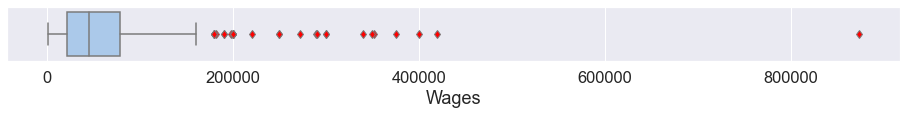

In [4]:
sns.set(rc={"figure.figsize":(16, 1)},font_scale=1.5)
ax=sns.boxplot(x='Wages',data=df,palette='pastel',flierprops=dict(markerfacecolor='red',markersize=6))

There are outliers in the data, especially at the higher end of the wage spectrum (represented by circles). The wages which fall outside the range between $Q_1-1.5IQR$ and $Q_3+1.5IQR$ are identified as outliers. Let's look at who these outliers are. 

In [5]:
percentile75=df['Wages'].quantile(0.75)
percentile25=df['Wages'].quantile(0.25)
upper_bound_wage=percentile75+1.5*(percentile75-percentile25)
wage_outliers=df[df.Wages>upper_bound_wage]
n_outliers=wage_outliers.shape[0]
outlier_wage_fraction=int(wage_outliers['Wages'].sum()/df['Wages'].sum()*100)
outlier_fraction=int(wage_outliers.shape[0]/df.shape[0]*100)
wage_outliers[["Wages","Squad"]].sort_values(by='Wages',ascending=False)

,Wages,Squad
Player,,
Cristiano Ronaldo,874038,MUN
Romelu Lukaku,419615,CHE
Kevin De Bruyne,400000,MCI
David de Gea,375000,MUN
Philippe Coutinho,351346,AVL
Jadon Sancho,350000,MUN
Raphaël Varane,340000,MUN
Jack Grealish,300000,MCI
Raheem Sterling,300000,MCI


In [6]:
outlier_teams=wage_outliers['Squad'].value_counts()
outlier_teams

MUN    9
LIV    6
CHE    5
MCI    4
ARS    2
AVL    1
TOT    1
Name: Squad, dtype: int64

There are {{ n_outliers }} outliers. These outliers, who consitute {{ outlier_fraction }}% of the players, account for {{ outlier_wage_fraction}}% of the total wage bill. (Fair reflection of the society, ahem!) All these outliers belong to the _big_ 6 teams, except 1. Manchester United accounts for more than one-third of these outliers. 

##### Outlier among outliers?
A quick glance at the boxplot above makes apparent that one data point (you-know-who) is miles apart from others. Let us see if that point is too far from the other outlier points. A boxplot or violinplot can help.

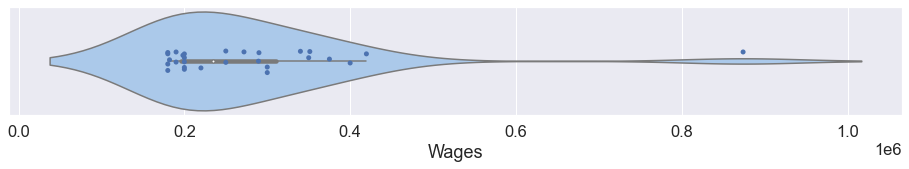

In [7]:
sns.set(rc={"figure.figsize":(16, 2)},font_scale=1.5)
sns.violinplot(x='Wages',data=wage_outliers,palette='pastel')#,flierprops=dict(markerfacecolor='red',markersize=8))
ax=sns.stripplot(x='Wages', data=wage_outliers)

Shh!!!.<br>
Let's get back to the entire player data set. The salary distribution for different teams can be compared using the box plot.

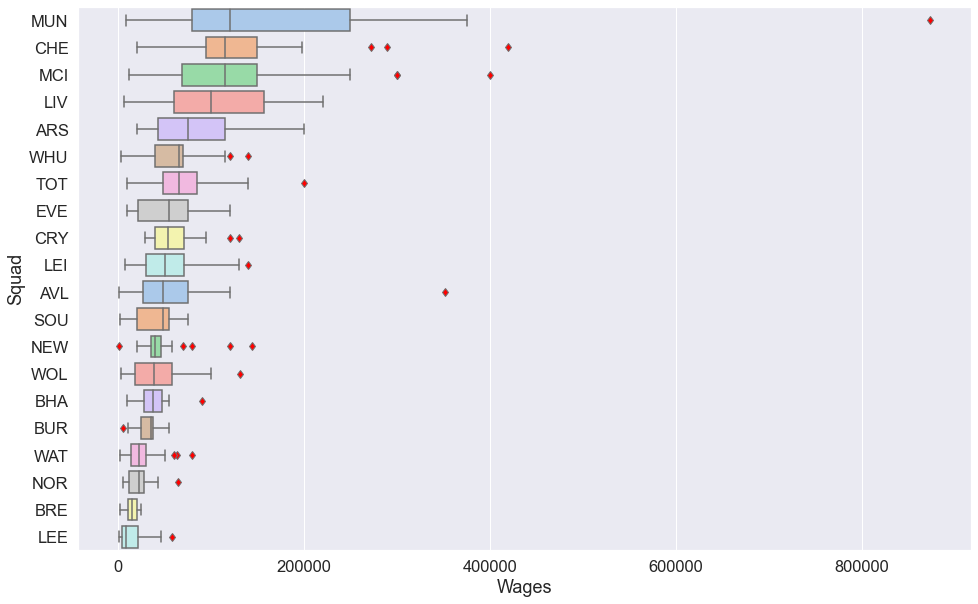

In [8]:
sortp=list(df[['Wages','Squad']].groupby('Squad').median().sort_values(by='Wages',ascending=False).index)
sns.set(rc={"figure.figsize":(16, 10)},font_scale=1.5)
ax=sns.boxplot(y='Squad',x='Wages',order=sortp,data=df,palette='pastel',flierprops=dict(markerfacecolor='red',markersize=6))

Five clubs (ARS, CHE, LIV, MCI and MUN) have player wages over a larger range compared to other teams. By any metric (median, percintile values, outliers), Manchester United players have higher wage than their counterparts elsewhere.<br>
It is now time to look at the average wage bill of each team.

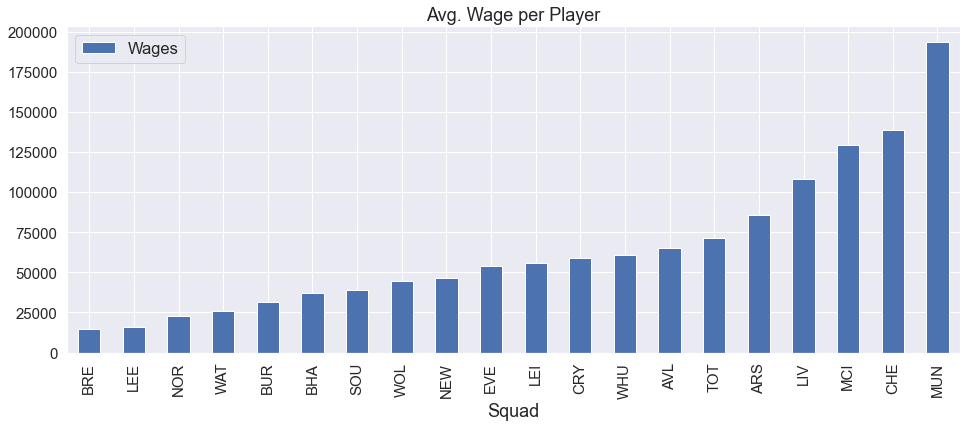

In [9]:
team_wage=df.groupby(['Squad']).Wages.mean().reset_index()
team_wage['Wages']=team_wage['Wages'].astype(int)
zx=team_wage.sort_values(by='Wages').plot.bar(figsize=(16,6),x='Squad',y='Wages',title='Avg. Wage per Player',fontsize=15)

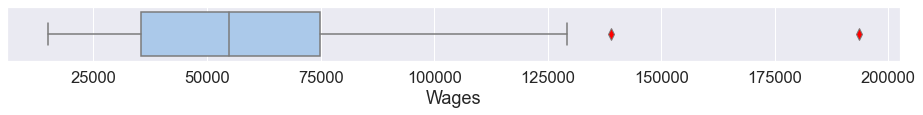

In [10]:
sns.set(rc={"figure.figsize":(16, 1)},font_scale=1.5)
ax=sns.boxplot(x='Wages',data=team_wage,palette='pastel',flierprops=dict(markerfacecolor='red',markersize=8))

Manchester United and Chelsea are the outliers, with Manchester City close behind. The three highest-paid players also belong to the same clubs, in the same order.

## Wage by position
Generally, the highest paid footballers are strikers and goal scorers. We will now look at how the wage bill is distributed across the pitch.

In [11]:
df.replace('MFDF','DFMF',inplace=True)

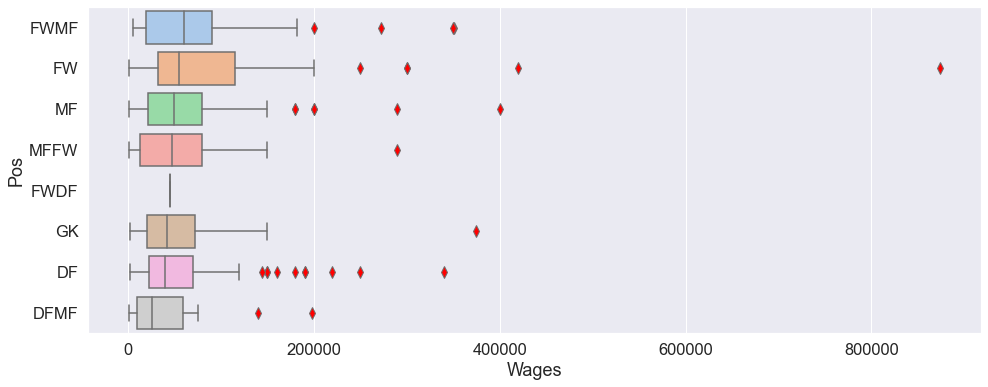

In [12]:
sortp=list(df[['Wages','Pos']].groupby('Pos').median().sort_values(by='Wages',ascending=False).index)
sns.set(rc={"figure.figsize":(16, 6)},font_scale=1.5)
ax=sns.boxplot(y='Pos',x='Wages',order=sortp,data=df,palette='pastel',flierprops=dict(markerfacecolor='red',markersize=8))

Nowadays, the roles of some players are not clearly defined. Modern footballers are versatile and they assume different roles in every game. Today, one may play as a winger and next week he will be the righ/left back. If we look at the median wages, we can see that forwards are paid more than midfielders and defenders. Median wage of goalkeepers is about the same as that of midfielders. We can find the position-wise mean salary.

In [13]:
team_pos=df[['Squad','Pos','Wages']].groupby(['Squad','Pos'],as_index=False).mean()
team_pos=team_pos.pivot(index='Squad',columns='Pos')
team_pos.replace(np.nan,0,inplace=True)

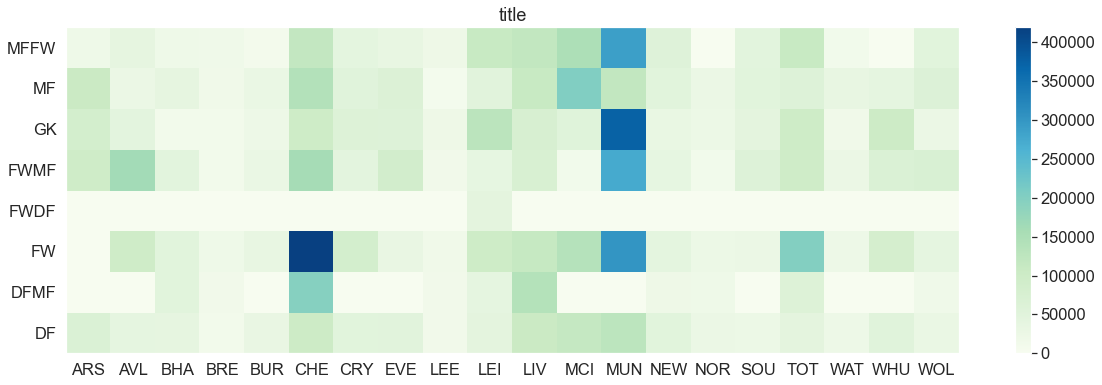

In [14]:
# Plot as heatmap
fig, ax = plt.subplots(figsize=(20,6))
im = ax.pcolor(team_pos.T, cmap='GnBu')

#label names
row_labels = team_pos.columns.levels[1]
col_labels = team_pos.index

#move ticks and labels to the center
ax.set_xticks(np.arange(team_pos.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(team_pos.shape[1]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(col_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

ax.set_title('title')

fig.colorbar(im)
plt.show()

Chelsea has the highest average wage bill for any position, for its forwards. This is in part due to the classification of players. Only one of their players is listed as a 'FW', who happens to be the second highest paid player in the league. Manchester United have higher spending on forwards, wingers (FWMF) and goal keepers. 

# Wage bill and Results
Ultimately, players are paid for what they do on the pitch. In an ideal case, the money spent on players should reflect on the team's performance and results. We know that is not necesarily the case, always. We can find the returns on the wage-spending using a measure - wage per player per points per game (WPP). For the data over an entire season average wage per point is enough. But, when we are in the middle of a season with different teams having played different number of games, the points accrued by each team has to be normalized for comparison. A lower value of WPP indicates that the team gets _better returns_ on their spending. 

In [15]:
pltable=pd.read_csv('Data/team_overall.csv')
new_index=pltable['Squad']
pltable.index=new_index
new_index=team_wage['Squad']
team_wage.index=new_index
team_wage=pd.concat([team_wage,pltable],axis=1)
team_wage['Team']=team_wage.index
team_wage['PPG']=team_wage.Pts/team_wage.MP

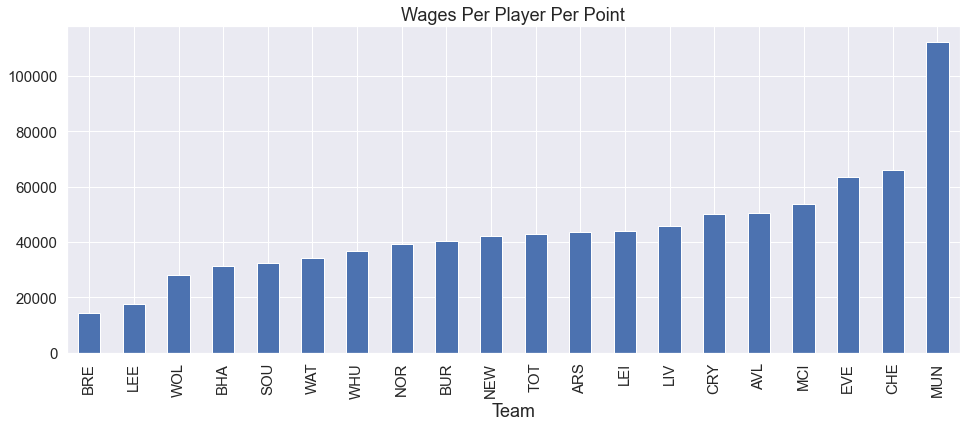

In [16]:
team_wage['WPP']=team_wage.Wages/team_wage.PPG
team_wage.sort_values(by='WPP',inplace=True)
team_wage['WPP']=team_wage.WPP.astype(int)
ax=team_wage.plot.bar(figsize=(16,6),x='Team',y='WPP',title='Wages Per Player Per Point',fontsize=15,legend=False)

Manchester United pays a player {{ team_wage.loc['MUN','WPP'] }}GBP every week for each point they earned in the league. On the other end, Brentford gets the best return for the {{ team_wage.loc['BRE','WPP'] }}GBP they pay a player every week. The league average WPP is {{ int(team_wage['WPP'].mean()) }} GBP. Wolves and Hammers find themselves in the top half of the table, despite the fact that they are frugal in comparison with other teams in top 10. 

## Results & Performance
For the teams we have the points per game as a measure of the _results_. There are several indicators such as xG, xA etc (almost an endless list) which underlines team/player performance. First, we shall have a look at some of these performance indicators for teams and how well they translate to gains in the table. Let us have a look at the table in terms of points and some key indicators.

In [17]:
table2=pltable.drop('Squad',axis=1)
table2.GF=table2.GF/table2.MP
table2.GA=table2.GA/table2.MP
table2.Pts=table2.Pts/table2.MP
table2.xG=table2.xG/table2.MP
table2.xGA=table2.xGA/table2.MP
table2['GD']=table2.GF-table2.GA
table2['xGD']=table2.xG-table2.xGA
table2.drop('MP',axis=1,inplace=True)
table2

,GF,GA,Pts,xG,xGA,GD,xGD
Squad,,,,,,,
MCI,2.344828,0.620690,2.413793,2.310345,0.731034,1.724138,1.579310
LIV,2.607143,0.714286,2.357143,2.542857,0.967857,1.892857,1.575000
CHE,2.035714,0.678571,2.107143,1.667857,0.885714,1.357143,0.782143
ARS,1.653846,1.115385,1.961538,1.584615,1.269231,0.538462,0.315385
MUN,1.655172,1.379310,1.724138,1.544828,1.424138,0.275862,0.120690
WHU,1.655172,1.241379,1.655172,1.379310,1.248276,0.413793,0.131034
WOL,1.000000,0.793103,1.586207,0.962069,1.396552,0.206897,-0.434483
TOT,1.555556,1.296296,1.666667,1.618519,1.162963,0.259259,0.455556
AVL,1.464286,1.392857,1.285714,1.150000,1.257143,0.071429,-0.107143


The above table is normalized by number of matches played by each team. Let us now look at the (Pearson) correlation between each of these measures.

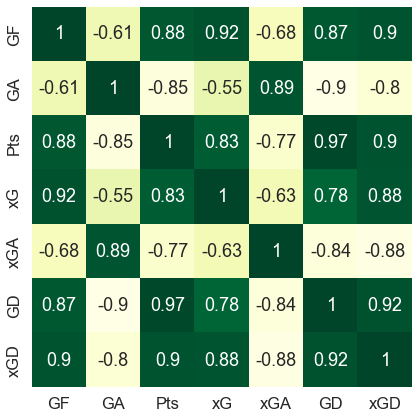

In [18]:
corr1=table2.corr(method='spearman')
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corr1,cmap='YlGn',annot=True,square=True,ax=ax,cbar=False)

There is good correlation between points and goals scored (positive) and goals conceded (negative), whin in turn are well correlated with xG and xGA respectively. We can now conclude that xG and xGA are good choice of performance indicators that rightly reflect the results.

Present day football database comprises deeper statistics such as distance from which shots are made, progressive passes, passes in different sectors of the pitch, tackles made etc. We shall now look at the correlation between some of these data points and the expected goal measures. That can highlight the key actions that may result in a goal being scored or conceded.

In [19]:
team_stats=pd.read_csv('Data/combined_team.csv')
team_stats.columns

Index(['Team', 'Gls', 'Ast', 'xG', 'xA', 'Sh/90', 'SoT/90', 'Dist', 'Cmp',
       'Att', 'KP', '1/3', 'PPA', 'CrsPA', 'ProgPass', 'Crs', 'SCA', 'GCA',
       'TchDefP', 'TchDef3', 'TchMid3', 'TchAtt3', 'TchAttP', 'DrSucc',
       'DrPast', 'ProgCrr', 'Crr1/3', 'CPA', 'vsGls', 'vsAst', 'vsxG', 'vsxA',
       'TklW', 'TklDef3', 'TklMid3', 'TklAtt3', 'Succ', 'PrsDef3', 'PrsMid3',
       'PrsAtt3', 'Blocks', 'Int', 'Clr', 'Recov', 'Won%', 'PrgDist', 'Press'],
      dtype='object')

#### Shots
From an attacking perspective, some of the important statistics are the shots, shots on target and distance from which a shot is taken which directly result in a goal. Then there are other actions which result in a goal or shot immediately. These actions could be offensive or defensive. 

In [20]:
attack=team_stats[["Team","xG","Sh/90","SoT/90","Dist","SCA","GCA"]]
new_index=attack.Team
attack.index=new_index
attack.drop("Team",axis=1,inplace=True)
attack

,xG,Sh/90,SoT/90,Dist,SCA,GCA
Team,,,,,,
Arsenal,1.58,15.54,4.92,16.9,24.5,2.50
Aston Villa,1.15,11.71,3.96,17.0,18.6,2.25
Brentford,1.18,10.31,3.28,15.8,14.6,1.59
Brighton,1.08,12.21,3.46,17.0,19.2,1.54
Burnley,0.89,10.11,2.85,16.9,14.4,1.33
Chelsea,1.67,13.96,4.89,16.6,23.3,3.46
Crystal Palace,1.20,10.52,3.55,15.7,16.2,2.00
Everton,1.12,11.69,3.38,17.2,18.3,1.58
Leeds United,1.28,13.52,3.97,18.0,20.3,1.69


Let us look at how much these statistics correlate with the expected goals.

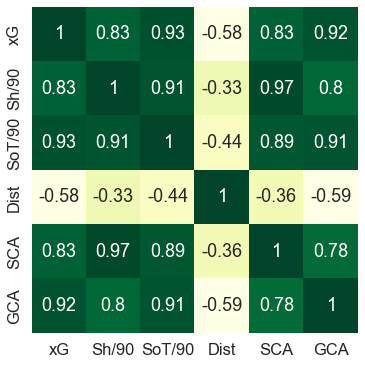

In [21]:
corr2=attack.corr(method='spearman')
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(corr2,cmap='YlGn',annot=True,square=True,ax=ax,cbar=False)

As expected these are all well correlated with the xG. It may also be noted that these statistics are well correlated among themselves excpet for the _distance from which a shot is taken_. This may force one to drop some of these statistics from further analysis. However, this is important when we do the analysis at the player level as the player who does a _goal/shot creating action_ need not be the _scorer_. Nevertheless, the former has a hand in the goal and can be considered as a meaningful contribution to the team's result. Another interesting observation is that the distance from which a shot is taken has not much correlation with whether it will end up in the back of the net. 

The following performance indicators are deemed relevant.

- xG
- Shots
- Shots on target
- Shot creating actions
- Goal creating actions

#### Is dribbling effective?
Many forward players are good at dribbling and are expected to be so. It is worth inspecting how effective are these dribbles in producing an end result.

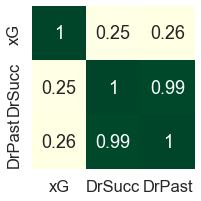

In [22]:
dribbles=team_stats[["xG","DrSucc","DrPast"]]
corr3=dribbles.corr(method='spearman')
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(corr3,cmap='YlGn',annot=True,square=True,ax=ax,cbar=False)

Data suggests that dribbles don't matter. 
#### Assists
Now that we have looked at some of the statistics associated with goal-scroing process itself, it is time to look at the next level of statistics. That is, the statistics associated with the processes which lead to shots and goals. In a broad sense, we can call these as creating chances. The easiest measure among these is the assists, followed by xA (similar to xG). 

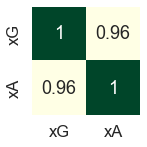

In [23]:
assists=team_stats[["xG","xA"]]
corr4=assists.corr(method='spearman')
f,ax=plt.subplots(figsize=(2,2))
#corr4.style.background_gradient(cmap='YlGn')
sns.heatmap(corr4,cmap='YlGn',annot=True,square=True,ax=ax,cbar=False)

After establishing the fact that there is good correlation between expected goals and expected assists (which is expected) we now look at certain actions which relate to these expected assists. This applied to a player in the creator role. These measures inclued key passes, passes made in 1/3rd, passes to the box, crosses to the box, progressive passes, progressive carries, carries into 1/3rd and carries into the box. There are other measures such as touches in different sections of the pitch that may have an impact, but are left out for now.

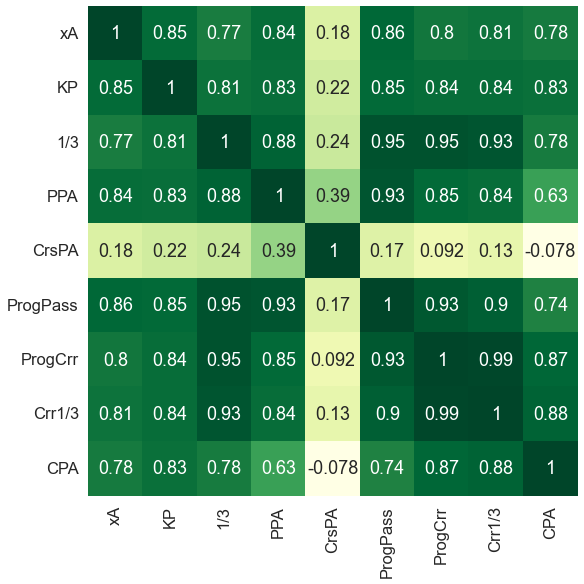

In [24]:
create=team_stats[["xA",'KP', '1/3', 'PPA', 'CrsPA', 'ProgPass','ProgCrr', 'Crr1/3', 'CPA']]
corr5=create.corr(method='spearman')
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corr5,cmap='YlGn',annot=True,square=True,ax=ax,cbar=False)

As expected key passes are highly correlated with assists. However crosses and carries are not as effective as passes, even if they are into the box (TAA may be an exception). It must be remebered that we are looking at the overall data and the variation across teams is indeed there, depending on their playing style. To keep the number of variables to a reasonable level for modelling purposes, we drop the carries and crosses.

The following indicators are deemed relevant for modelling.

- xA
- Key passes
- Passes completed in attacking third
- Passes comppleted in opposition box
- Progressive passes
- Progressive carries
- Carries into attacking thirs
- carries into opposition box

#### Defensive actions
It is now time to focus on a team's defense and how defensive actions translate to results. We did see that xGA is resonable well correlated with points. It is imperative to look at how various defensive actions such as tackles, interceptions, clearences, recoveries and blocks are correlated to the expected goals allowed.

In [25]:
team_stats.columns

Index(['Team', 'Gls', 'Ast', 'xG', 'xA', 'Sh/90', 'SoT/90', 'Dist', 'Cmp',
       'Att', 'KP', '1/3', 'PPA', 'CrsPA', 'ProgPass', 'Crs', 'SCA', 'GCA',
       'TchDefP', 'TchDef3', 'TchMid3', 'TchAtt3', 'TchAttP', 'DrSucc',
       'DrPast', 'ProgCrr', 'Crr1/3', 'CPA', 'vsGls', 'vsAst', 'vsxG', 'vsxA',
       'TklW', 'TklDef3', 'TklMid3', 'TklAtt3', 'Succ', 'PrsDef3', 'PrsMid3',
       'PrsAtt3', 'Blocks', 'Int', 'Clr', 'Recov', 'Won%', 'PrgDist', 'Press'],
      dtype='object')

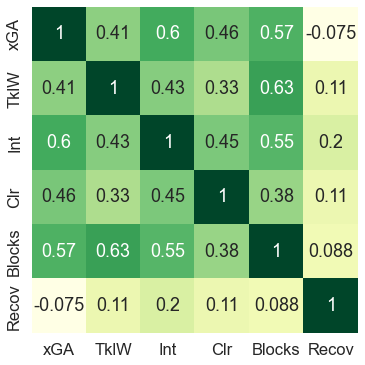

In [27]:
defense=team_stats[['vsxG','TklW','Int','Clr','Blocks','Recov']]
defense.rename(columns={'vsxG':'xGA'},inplace=True)
corr6=defense.corr(method='spearman')
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(corr6,cmap='YlGn',annot=True,square=True,ax=ax,cbar=False)

Positive correlation between these measures and xGA is surprising. Normally, these defensive actions are expected to reduce chances of conceding a goal. However, the positive correlation indicates that these measurables are not indicative of a good defensive performacnce.
#### Pressing
Recently, much emphasis has been placed on _pressing_. The two most succesful PL teams in the last 5 years excel in that aspect of the game. We shall now look at how pressing statistics correlate with goal prevention. The database has information on number of pressures applied across different sectors and an overall success rate. By assuming that the success rate is same across different sectors, succesful pressures across the sectors are estimated.

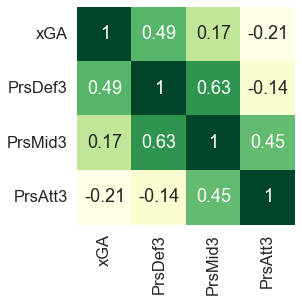

In [28]:
press=team_stats[['vsxG','PrsDef3', 'PrsMid3','PrsAtt3',]]
press.rename(columns={'vsxG':'xGA'},inplace=True)
corr7=press.corr(method='spearman')
f,ax=plt.subplots(figsize=(4,4))
sns.heatmap(corr7,cmap='YlGn',annot=True,square=True,ax=ax,cbar=False)

Their is no meaningful correlation between pressing statistics and not conceding goals. Only pressures applied in the attacking third has a positive, albeit minor, impact on defensive record. 

The bottomline is that none of the measurable actions in the database is indicative of a good defensive performance. It may be that, good defense is not about any observable actions but has to do with features that are not measurable by the current approach.

#### Performance indicators for modelling
Since we cannot establish solid correlations between defensive results and performance indicators, the modelling has to be based on attacking performance. Therefore, we will restrict ourselves to midfielders, wingers and forwards.